<a href="https://colab.research.google.com/github/anasjawed283/MachineLearningBasics/blob/main/LAB_4_Task_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   ML for Robotics L25+L26 TASK 1 ID3 for Classification
*   Anas Jawed
*   21BRS1336
*   List item





In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder


In [6]:
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/data/Categorical1.csv')

# Display the first few rows of the dataset
print(df.head())


  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO        

In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows/columns with missing values as appropriate
df = df.dropna()  # or df.fillna(method='ffill', inplace=True) or other appropriate methods

# Encode categorical variables if necessary
# For example, using LabelEncoder for encoding 'Expert Diagnose' if it's a categorical feature
label_encoder = LabelEncoder()
df['Expert Diagnose'] = label_encoder.fit_transform(df['Expert Diagnose'])

# Separate features and target variable
X = df.drop(columns=['Expert Diagnose'])
y = df['Expert Diagnose']

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Expert Diagnose        0
dtype: int64


In [8]:
print(df.dtypes)

Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Expert Diagnose         int64
dtype: object


In [9]:
# Drop columns that are not useful or non-numeric
X = df.drop(columns=['Patient Number', 'Expert Diagnose'])
y = df['Expert Diagnose']


In [10]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each categorical column
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a column transformer with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations
X = preprocessor.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split

# Re-split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')  # 'entropy' corresponds to ID3
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.61
Precision: 0.67
Recall: 0.61
F1 Score: 0.60


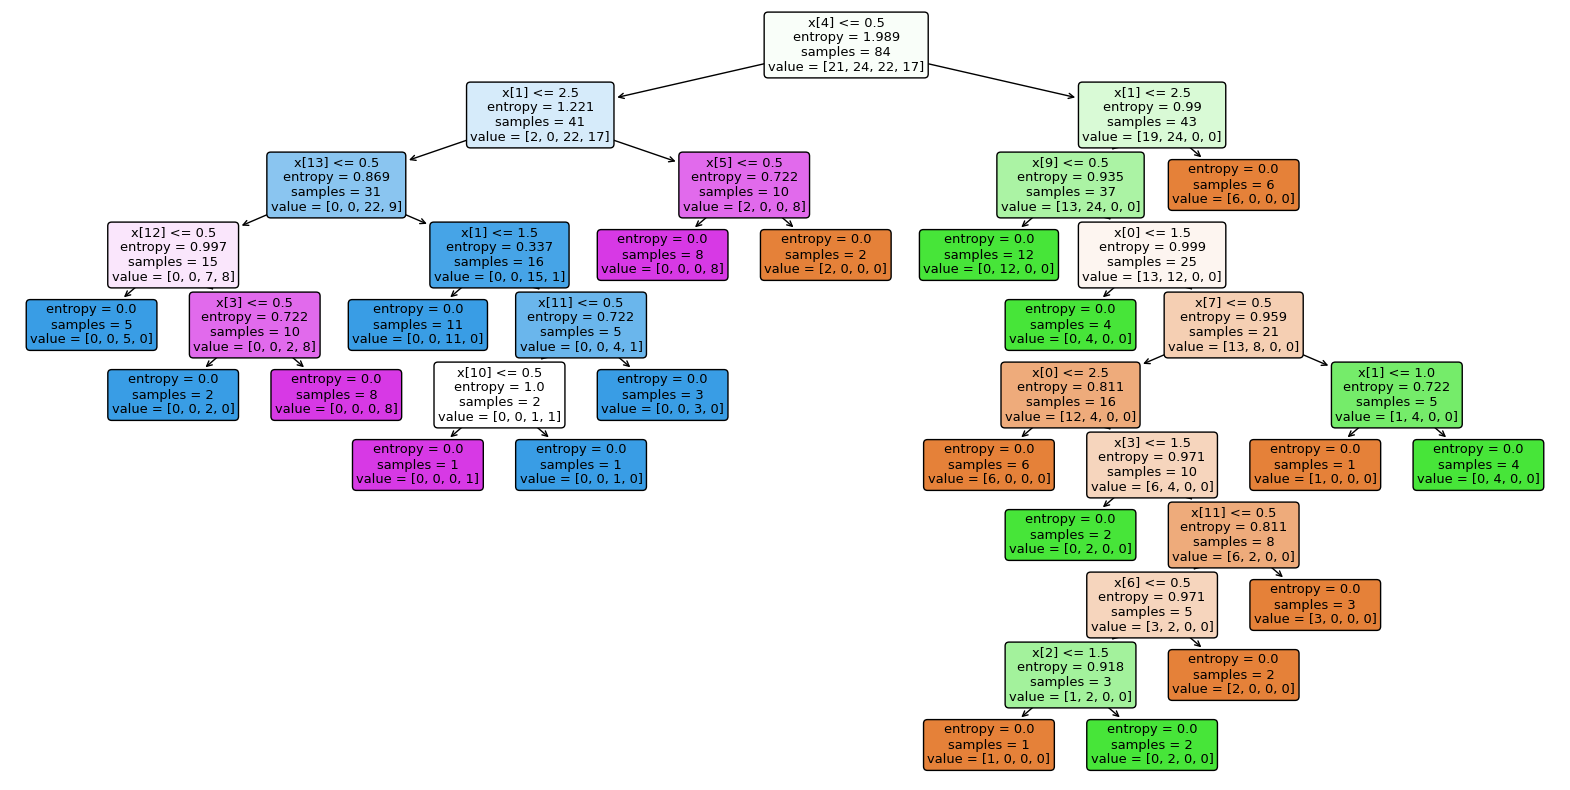

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True)
plt.show()
